# 1

1 b

In [32]:
import numpy as np
from a6_utils import drawEllipse
import matplotlib.pyplot as plt
import os
import cv2

In [33]:
def PCA(X):
    m = len(X)
    N = len(X[0])

    mean = 1 / N * np.sum(X, axis=1, keepdims=True)
    X = X - mean # centering

    C = 1 / (N-1) * np.dot(X, X.T)
    U, S, Vt = np.linalg.svd(C)
    
    return mean, C, U, S, Vt

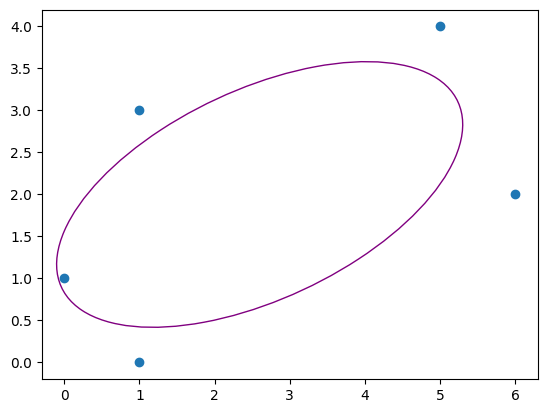

In [34]:
X = np.loadtxt('data/points.txt')
X = np.transpose(X)
mean, C, U, S, Vt = PCA(X)

drawEllipse(mean, C)
plt.scatter(X[0], X[1])
plt.show()


1 c

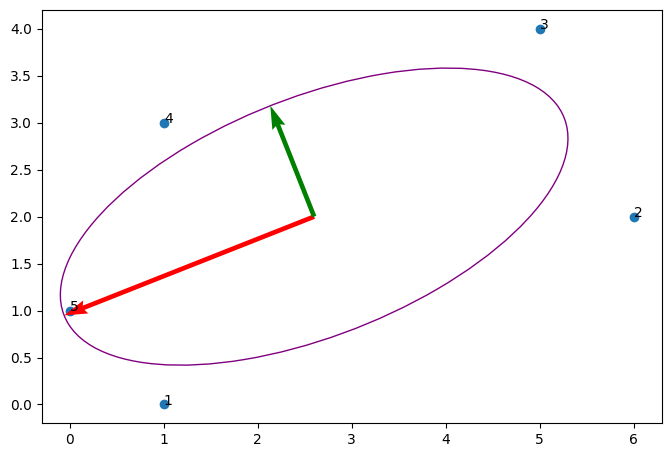

In [35]:
eigenvalue1 = S[0]
eigenvalue2 = S[1]
eigenvector1 = U[0] * np.sqrt(eigenvalue1)
eigenvector2 = U[1] * np.sqrt(eigenvalue2)
fig, ax = plt.subplots(figsize=(8, 8))
drawEllipse(mean, C)
plt.scatter(X[0], X[1])
for i, (x, y) in enumerate(X.T):
    plt.text(x, y, i + 1)
ax.set_aspect('equal', adjustable='box') 
ax.quiver(*mean, *eigenvector1, color='r', angles='xy', scale_units='xy', scale=1)
ax.quiver(*mean, *eigenvector2, color='g', angles='xy', scale_units='xy', scale=1)
plt.show()

1 d

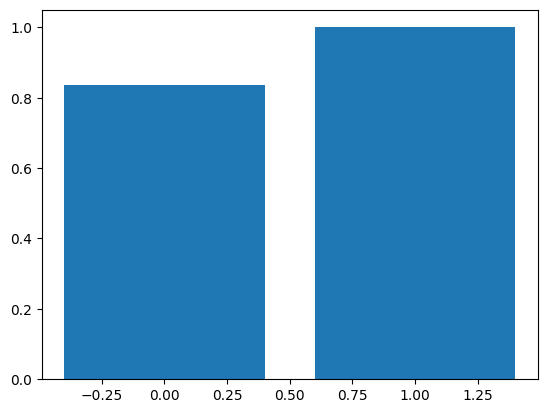

We would retain 83.56894724407343 %.


In [36]:
cumulative_sum = np.cumsum(S)
cumulative_sum = cumulative_sum / np.max(cumulative_sum)
x_values = range(len(cumulative_sum))
plt.bar(x_values, cumulative_sum)
plt.show()
print("We would retain", cumulative_sum[0] * 100, "%.")


1 e

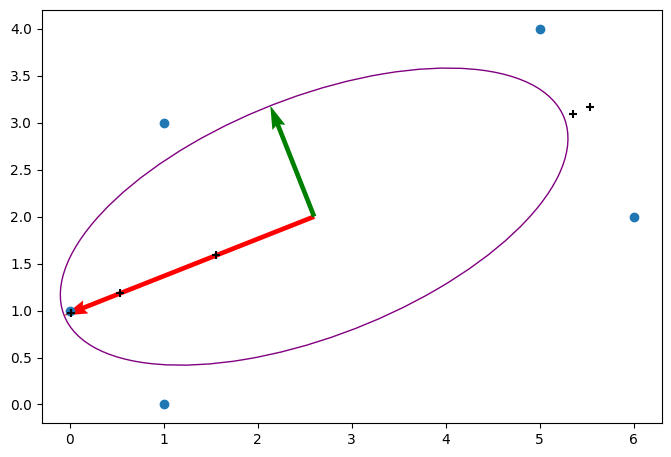

In [37]:
X_subspace = U.T @ (X - mean) # subspace
X_subspace[-1, :] = 0 # manjsiga na 0 
X_new = U @ X_subspace + mean # nazaj

fig, ax = plt.subplots(figsize=(8, 8))
drawEllipse(mean, C)

ax.set_aspect('equal', adjustable='box') 
ax.quiver(*mean, *eigenvector1, color='r', angles='xy', scale_units='xy', scale=1)
ax.quiver(*mean, *eigenvector2, color='g', angles='xy', scale_units='xy', scale=1)

plt.scatter(X[0], X[1])
plt.scatter(X_new[0], X_new[1], c='black', marker='+')
plt.show()

1 f

In [38]:
def calculate_closest_point(point, points):
    distances = np.linalg.norm(points - point, axis=0)
    arg = np.argmin(distances)
    return points[:, arg], arg+1

Closest point to q is [5. 4.] with index 3
Closest point to q is [5.54021325 3.16269992] with index 2


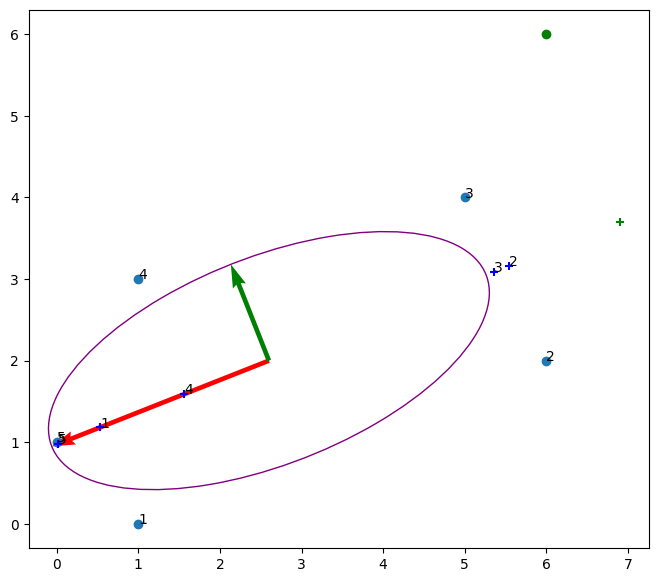

In [39]:
q = np.array([6, 6]).reshape(-1, 1)
closest_point,closest_i  = calculate_closest_point(q, X)
print("Closest point to q is", closest_point , "with index", closest_i)

# projection to subspace
q_subspace = U.T@ (q - mean)
q_subspace[-1, :] = 0
q_new = U @ q_subspace + mean

fig, ax = plt.subplots(figsize=(8, 8))
drawEllipse(mean, C)

ax.set_aspect('equal', adjustable='box')
ax.quiver(*mean, *eigenvector1, color='r', angles='xy', scale_units='xy', scale=1)
ax.quiver(*mean, *eigenvector2, color='g', angles='xy', scale_units='xy', scale=1)

plt.scatter(X[0], X[1])

for i, (x, y) in enumerate(X.T):
    plt.text(x, y, i + 1)

for i, (x, y) in enumerate(X_new.T):
    plt.text(x, y, i + 1)

plt.scatter(q[0], q[1], c='green', marker='o')
plt.scatter(X_new[0], X_new[1], c='blue', marker='+')
plt.scatter(q_new[0], q_new[1], c='green', marker='+')

new_closest_point, new_closest_i= calculate_closest_point(q_new, X_new)
print("Closest point to q is", new_closest_point , "with index", new_closest_i)

plt.show()

# 2 

2 a

In [40]:
def dual_pca(X):
    m = len(X)
    N = len(X[0])

    mean_value = 1 / N * np.sum(X, axis=1, keepdims=True)
    Xd = X - mean_value

    C = (1 / (N - 1)) * (Xd.T @ Xd)

    U, S, Vt = np.linalg.svd(C)
    #dual part
    S = S + 1e-15 # to avoid division by 0
    U = Xd @ U @ np.diag(np.sqrt(1 / (S * (N - 1))))

    return mean_value, C, U, S, Vt

In [41]:
X = np.loadtxt('data/points.txt').T
mean_value, C, U, S, Vt = PCA(X)
mean_value_dual, C_dual, U_dual, S_dual, Vt_dual = dual_pca(X)

print("U =", U)
print("U_dual =", U_dual[:, :2])

U = [[-0.92992935 -0.36773822]
 [-0.36773822  0.92992935]]
U_dual = [[ 0.92992935 -0.36773822]
 [ 0.36773822  0.92992935]]


2 b

In [42]:
X_subspace = U_dual.T @ (X - mean_value_dual)
X_original = U_dual @ X_subspace + mean_value_dual
print("result with dual PCA - result with the ordinary PCA =", X_original - X)

result with dual PCA - result with the ordinary PCA = [[ 6.66133815e-16 -1.77635684e-15 -1.77635684e-15  1.11022302e-15
   2.22044605e-15]
 [ 1.11022302e-15  0.00000000e+00 -8.88178420e-16 -8.88178420e-16
   4.44089210e-16]]


# 3

3 a

In [43]:
def read_images_from_folder(folder_path):
    image_vectors = []
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY).astype('float64')
        m, n = image.shape
        image_vector = np.reshape(image, (m * n, 1))
        image_vectors.append(image_vector)
    return np.column_stack(image_vectors), m, n

In [44]:
path = 'data/faces/1/'
image_vectors, m, n = read_images_from_folder(path)

In [45]:
print(m,n, m*n)
image_vectors.shape

96 84 8064


(8064, 64)

3 b

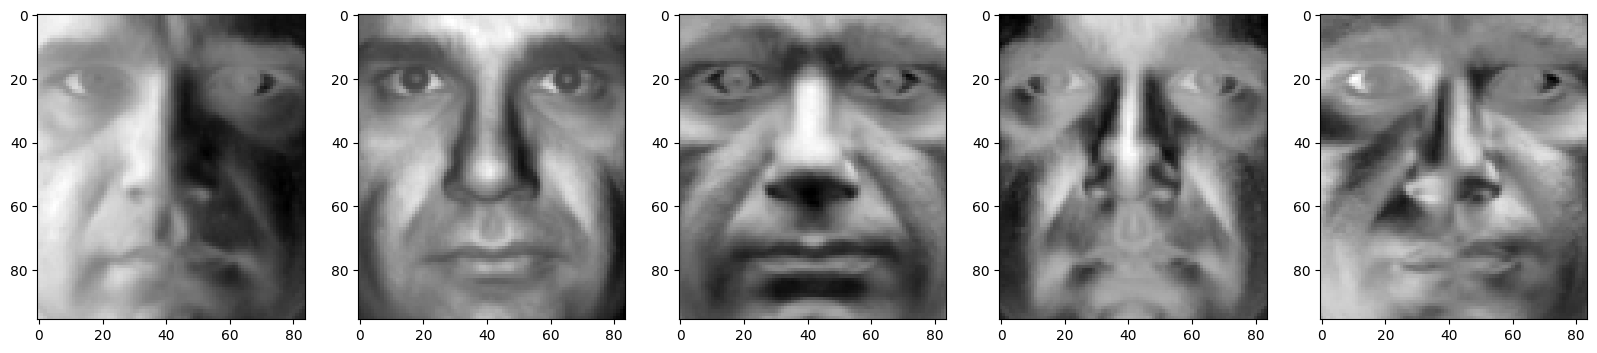

In [46]:
mean_value, C, U, S, Vt = dual_pca(image_vectors)


plt.figure(figsize=(20,5))
for i in range(5):
	plt.subplot(1,5,i+1)
	plt.imshow(U[:,i].reshape((96, 84)), cmap="gray")
plt.show()

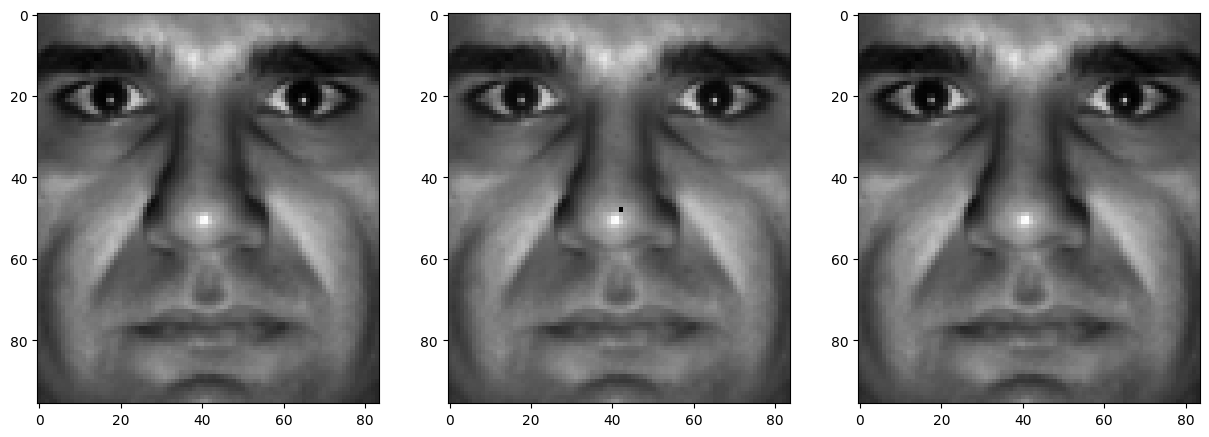

In [47]:
plot_images= []
first_image = image_vectors[:, 0].reshape(-1,1)
plot_images.append(np.reshape(first_image, (m, n)))
first_image_changed = np.copy(first_image)
first_image_changed[4074] = 0
plot_images.append(np.reshape(first_image_changed, (m, n)))
first_image_subspace = U.T @ (first_image - mean_value)
first_image_subspace_changed = np.copy(first_image_subspace)
first_image_subspace_changed[0] = 0
first_image_original = U @ first_image_subspace_changed + mean_value
plot_images.append((np.reshape(first_image_original, (m, n))))

fig, axes = plt.subplots(1, 3, figsize=(15, 15))
for i, ax in enumerate(axes.flat):
    ax.imshow(plot_images[i], cmap='gray')
plt.show()

3 c

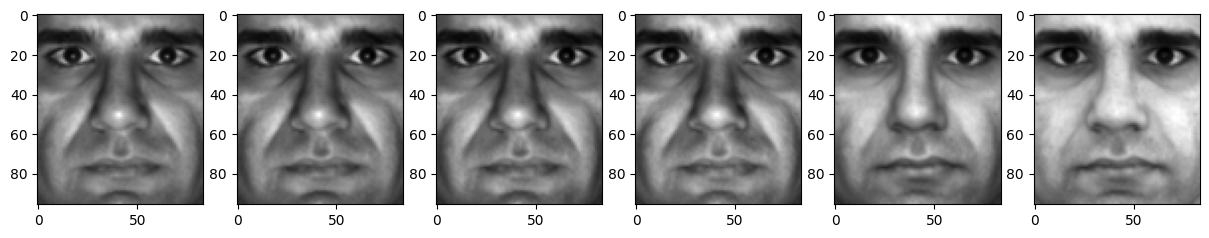

In [48]:
image = image_vectors[:, 0].reshape(-1,1)

retained_images = []
for i in range(6):
    image_subspace = U.T @ (image - mean_value)
    exponent = np.power(2, i)
    image_subspace_retained = np.copy(image_subspace)
    image_subspace_retained[exponent:, :] = 0
    image_original_retained = U @ image_subspace_retained + mean_value
    retained_images.append(np.reshape(image_original_retained, (m, n)))
retained_images = np.flip(retained_images, axis=0)

fig, axes = plt.subplots(1, 6, figsize=(15, 15))
for i, ax in enumerate(axes.flat):
    ax.imshow(retained_images[i], cmap='gray')
plt.show()

3 d

In [49]:
image_vectors,m,n = read_images_from_folder('data/faces/2/')

mean_value, C, U, S, V_T = dual_pca(image_vectors)

avg_image = np.zeros_like(image_vectors[:, 0])

for i in range(image_vectors.shape[1]):
	avg_image += image_vectors[:, i]

avg_image /= image_vectors.shape[1]
avg_image = avg_image.reshape((-1,1))

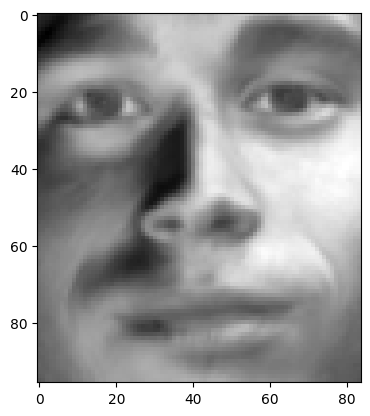

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


avg_image_pca = U.T @ (avg_image - mean_value)

fig, ax = plt.subplots()
fi = np.linspace(0, 2*np.pi, 100)

def animate(i):
    ax.clear()
    
    pca_copy = avg_image_pca.copy()
    
    pca_copy[0] = np.sin(fi[i]) * 3000  
    pca_copy[1] = np.cos(fi[i]) * 3000 
    pca_copy[2] = np.sin(fi[i]) * 3000  
    pca_copy[3] = np.cos(fi[i]) * 3000 
    
    # Transform the modified pca_copy back to the image space
    avg_face_transformed = U @ pca_copy + mean_value
    
    # Display the updated image
    im = ax.imshow(avg_face_transformed.reshape((m, n)), cmap='gray')
    
    return im,

ani = animation.FuncAnimation(fig, animate, frames=100, interval=20, blit=True)
plt.show()


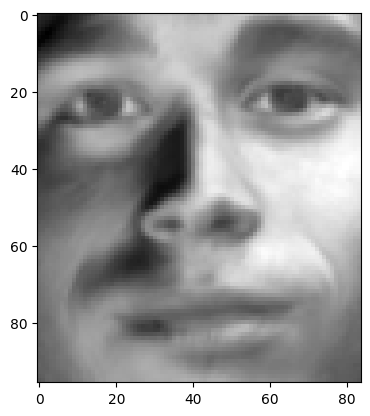

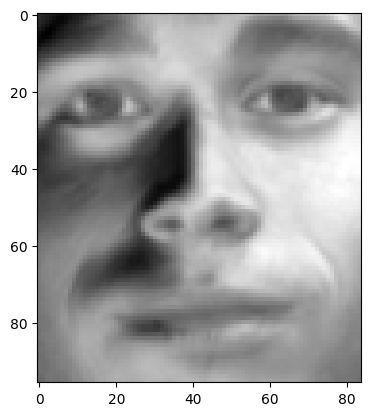

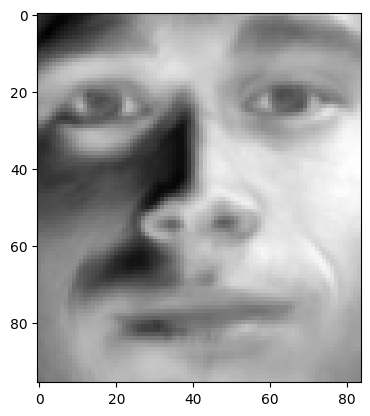

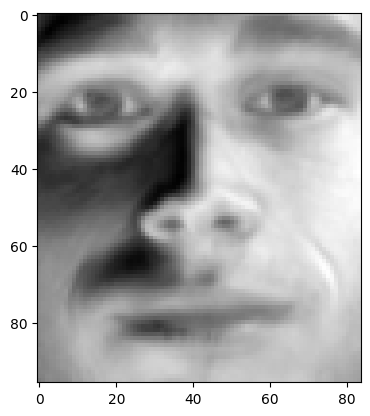

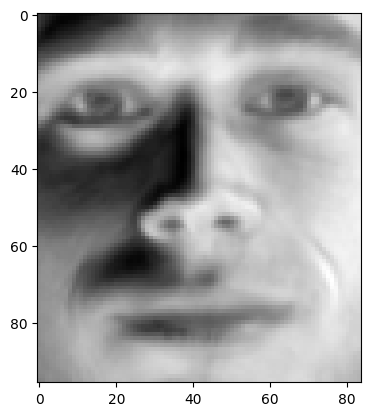

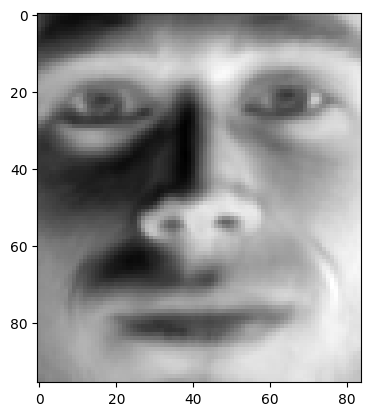

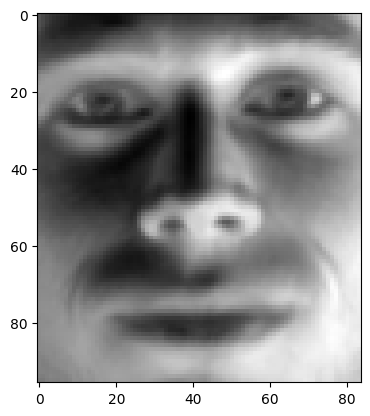

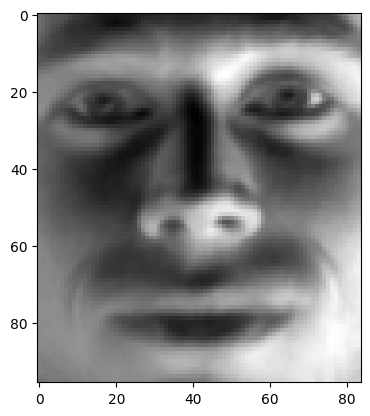

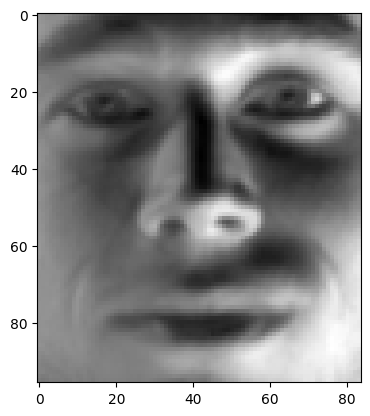

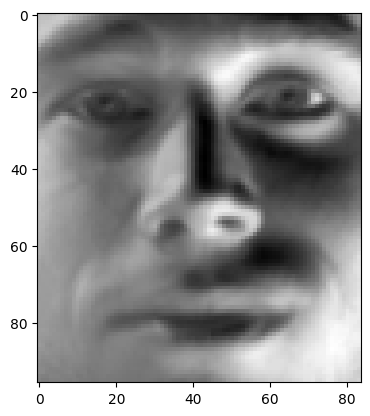

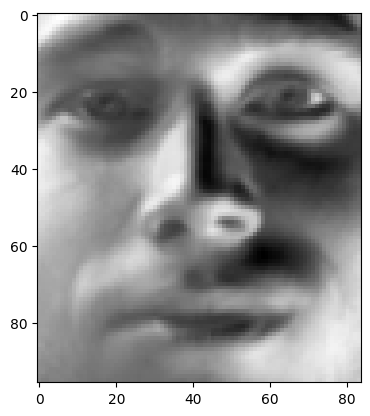

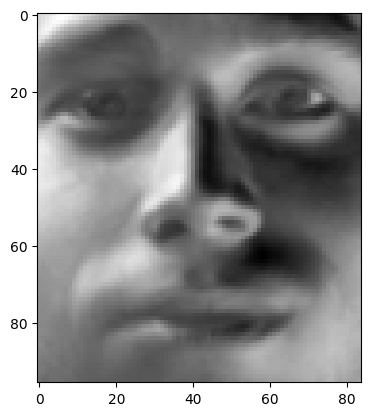

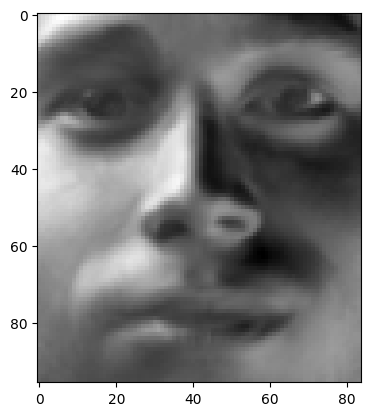

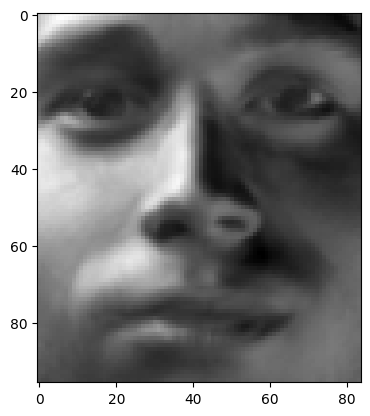

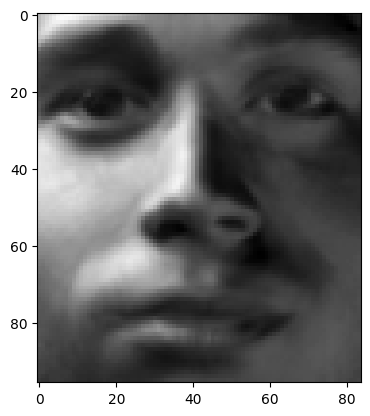

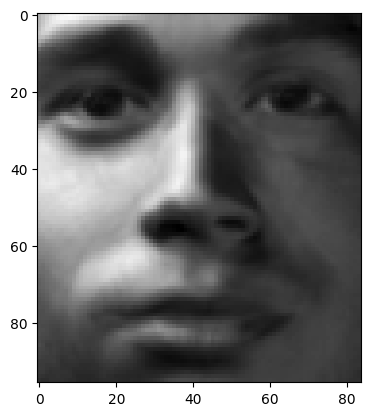

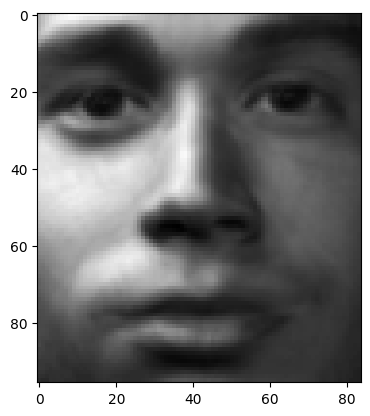

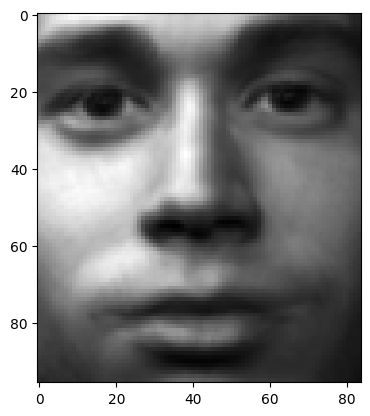

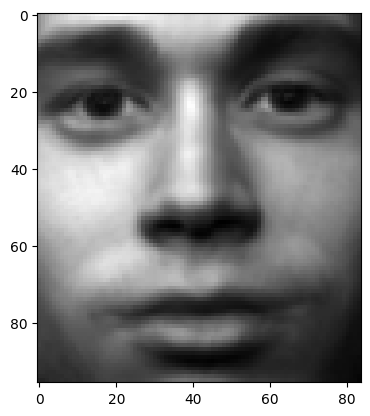

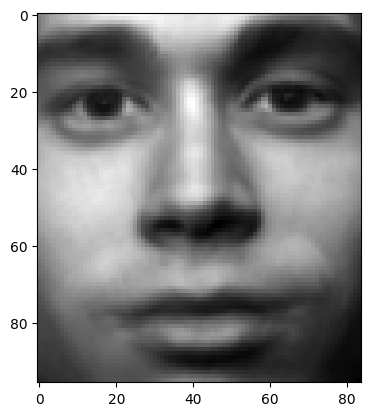

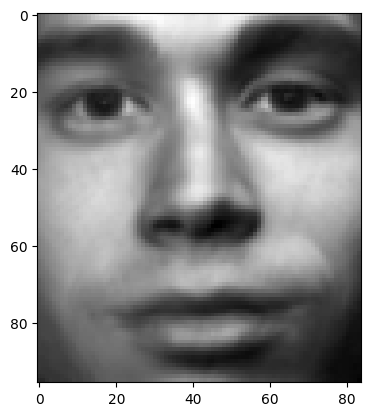

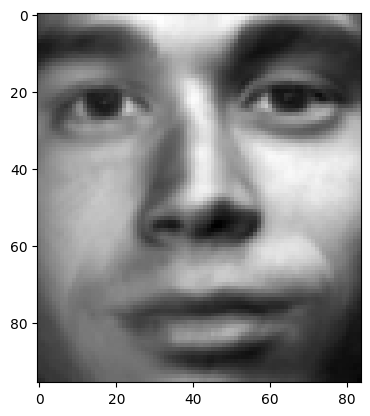

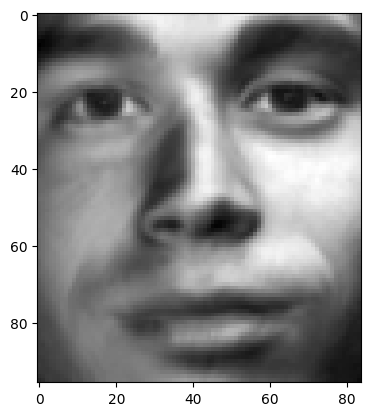

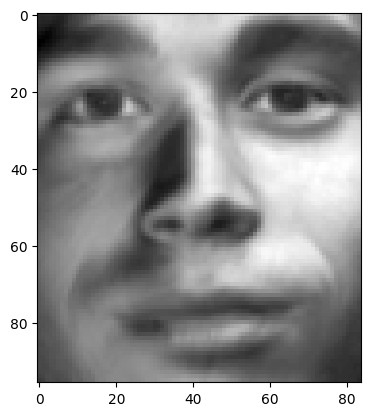

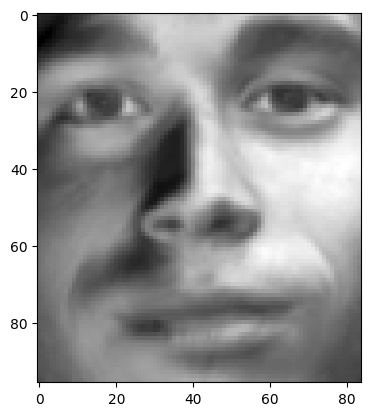

In [51]:

avg_image_pca = U.T @ (avg_image - mean_value)

fig, ax = plt.subplots()
fi = np.linspace(0, 2*np.pi, 100)

for i in range(100):
    # Create a copy of avg_image_pca to avoid modifying the original array
    pca_copy = avg_image_pca.copy()
    
    # Update the first two components based on the sine and cosine functions
    pca_copy[0] = np.sin(fi[i]) * 3000  
    pca_copy[1] = np.cos(fi[i]) * 3000 
    pca_copy[2] = np.sin(fi[i]) * 3000  
    pca_copy[3] = np.cos(fi[i]) * 3000 
    
    # Transform the modified pca_copy back to the image space
    avg_face_transformed = U @ pca_copy + mean_value
    
    if i % 4 == 0:
        plt.imshow(avg_face_transformed.reshape((m, n)), cmap='gray')
        plt.show()



3 e

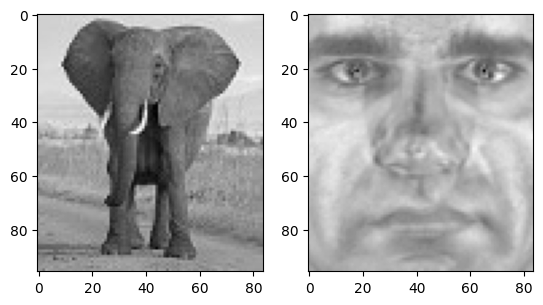

In [52]:
image_vectors, m, n = read_images_from_folder('data/faces/1/')
mean_value, C, U, S, V_T = dual_pca(image_vectors)

elephant = cv2.cvtColor(cv2.imread('data/elephant.jpg'), cv2.COLOR_BGR2GRAY).astype('float64')
elephant = elephant.reshape((-1,1))
elephant_subspace = U.T @ (elephant - mean_value)
elephant_original = U @ elephant_subspace + mean_value
elephant = np.reshape(elephant, (m, n))
elephant_original = np.reshape(elephant_original, (m, n))

plt.subplot(1,2,1)
plt.imshow(elephant, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(elephant_original, cmap='gray')
plt.show()

3 f

In [53]:
images = []

for filename in os.listdir('data/faces/4/'):
    image_path = os.path.join('data/faces/4/', filename)
    image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY).astype('float64')
    image = cv2.resize(image, (100, 100))
    images.append(image)

images = np.array(images)

In [54]:
image_vectors = []

for image in images:
    image_vectors.append(np.reshape(image, (10000, 1)))

image_vectors = np.column_stack(image_vectors)

image_vectors.shape

(10000, 12)

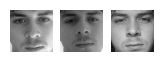

In [55]:
for i in range(3):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(images[i+3], cmap='gray')

In [56]:
#pca
mean_value, C, U, S, V_T = dual_pca(image_vectors)

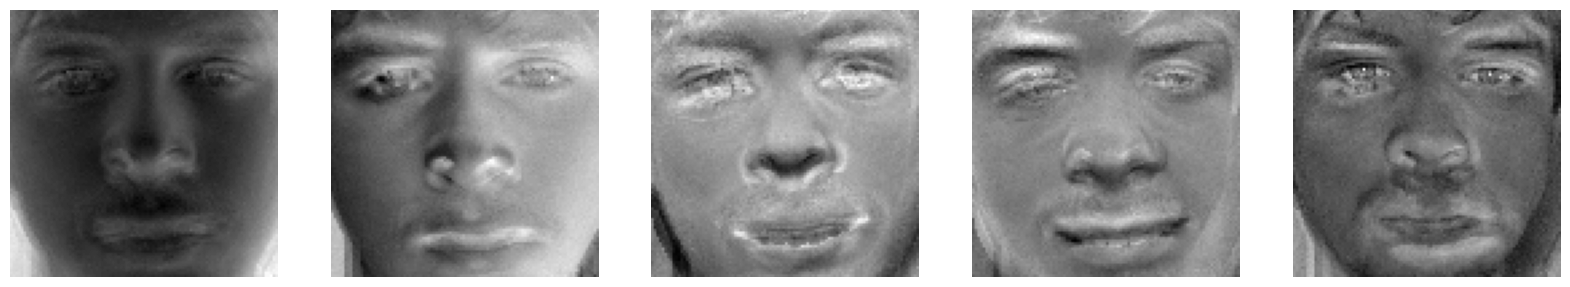

In [57]:
#first 5 eigenfaces
plt.figure(figsize=(20,5))
for i in range(5):
	plt.subplot(1,5,i+1)
	plt.axis('off')
	plt.imshow(U[:,i].reshape((100, 100)), cmap="gray")
plt.show()

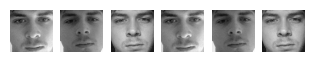

In [58]:
#project images to subspace
image_subspace = U.T @ (image_vectors - mean_value)

#reconstruct images
image_original = U @ image_subspace + mean_value

#plot original and reconstructed images
for i in range(3):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(np.reshape(image_vectors[:, i+3], (100, 100)), cmap='gray')
    plt.subplot(1, 10, i + 4)
    plt.axis('off')
    plt.imshow(np.reshape(image_original[:, i+3], (100, 100)), cmap='gray')


In [59]:
def detect_faces(frame):
    # Load the pre-trained Haar cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Convert the frame to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    return faces


In [60]:
import cv2
import numpy as np
from sklearn.decomposition import PCA

cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = cap.read()

    faces = detect_faces(frame)

    for (x, y, w, h) in faces:

        adj = 25
        # plot the face region
        cv2.rectangle(frame, (x+adj, y+adj), (x+w-adj, y+h-adj), (0, 255, 0), 2)

        face_region = frame[y+adj: y+h-adj, x+adj:x+w-adj]
        face_region = cv2.cvtColor(face_region, cv2.COLOR_BGR2GRAY)
        face_region_flattened = cv2.resize(face_region, (100, 100)).flatten()
        face_region_flattened = face_region_flattened.reshape(-1, 1)
        # print(face_region_flattened.shape)

        # # Recognize the face
        # print("Shape of U.T:", U.T.shape)
        # print("Shape of face_region_flattened - mean:", (face_region_flattened - mean_value).shape)

        face_to_subspace = U.T @ (face_region_flattened - mean_value)

        # Reconstruct the face regions from the PCA subspace
        reconstructed_face = U @ face_to_subspace + mean_value

        # Calculate the L2 norm (Euclidean distance) between the original and reconstructed face
        l2_norm = np.linalg.norm(face_region_flattened - reconstructed_face)

        #plot the l2 norm
        cv2.putText(frame, 'L2 norm: ' + str(l2_norm), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)


    cv2.imshow('Facial Recognition', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
